In [1]:
import pandas as pd

In [2]:
A=pd.read_csv("F:/data science workshop/DATA-SET/data/Cars93.csv")

In [3]:
A.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [4]:
A.columns

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [5]:
from sklearn.cluster import AgglomerativeClustering
agc=AgglomerativeClustering(n_clusters=3)
B=A[["Price","MPG.city"]]
model=agc.fit(B)

In [6]:
model.labels_

array([0, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 2], dtype=int64)

In [7]:
col=[]
for i in model.labels_:
    if(i==0):
        col.append("red")
    elif(i==1):
        col.append("orange")
    else:
        col.append("blue")

In [8]:
import matplotlib.pyplot as plt

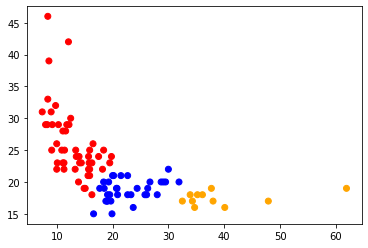

In [10]:
plt.scatter(B.Price,B['MPG.city'],c=col)

In [12]:
list(zip(model.labels_,col))

[(0, 'red'),
 (1, 'orange'),
 (2, 'blue'),
 (1, 'orange'),
 (2, 'blue'),
 (0, 'red'),
 (2, 'blue'),
 (2, 'blue'),
 (2, 'blue'),
 (1, 'orange'),
 (1, 'orange'),
 (0, 'red'),
 (0, 'red'),
 (0, 'red'),
 (0, 'red'),
 (0, 'red'),
 (2, 'blue'),
 (2, 'blue'),
 (1, 'orange'),
 (2, 'blue'),
 (0, 'red'),
 (2, 'blue'),
 (0, 'red'),
 (0, 'red'),
 (0, 'red'),
 (2, 'blue'),
 (0, 'red'),
 (2, 'blue'),
 (0, 'red'),
 (2, 'blue'),
 (0, 'red'),
 (0, 'red'),
 (0, 'red'),
 (0, 'red'),
 (0, 'red'),
 (2, 'blue'),
 (2, 'blue'),
 (2, 'blue'),
 (0, 'red'),
 (0, 'red'),
 (0, 'red'),
 (0, 'red'),
 (0, 'red'),
 (0, 'red'),
 (0, 'red'),
 (0, 'red'),
 (0, 'red'),
 (1, 'orange'),
 (2, 'blue'),
 (1, 'orange'),
 (1, 'orange'),
 (1, 'orange'),
 (0, 'red'),
 (0, 'red'),
 (0, 'red'),
 (2, 'blue'),
 (1, 'orange'),
 (2, 'blue'),
 (1, 'orange'),
 (0, 'red'),
 (0, 'red'),
 (0, 'red'),
 (2, 'blue'),
 (0, 'red'),
 (0, 'red'),
 (2, 'blue'),
 (2, 'blue'),
 (0, 'red'),
 (0, 'red'),
 (2, 'blue'),
 (2, 'blue'),
 (0, 'red'),
 (0, 're

In [13]:
import scipy.spatial as sp
dist_matrix=sp.distance_matrix(B.values,B.values)

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram
lmat=linkage(dist_matrix)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


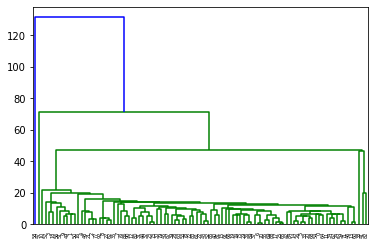

In [17]:
import matplotlib.pyplot as plt
dendrogram(lmat)
plt.show()

## Here as there are many points our dendrogram is not clearly visible insted we can take less no of points

In [18]:
from sklearn.cluster import AgglomerativeClustering
agc=AgglomerativeClustering(n_clusters=3)
B=A[["Price","MPG.city"]][1:25]
model=agc.fit(B)

In [19]:
import scipy.spatial as sp
dist_matrix=sp.distance_matrix(B.values,B.values)

In [20]:
from scipy.cluster.hierarchy import dendrogram,linkage
lmat=linkage(dist_matrix)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


In [21]:
lmat

array([[ 1.        , 20.        ,  1.84252823,  2.        ],
       [ 4.        , 19.        ,  2.96407086,  2.        ],
       [13.        , 25.        ,  3.47702484,  3.        ],
       [ 2.        , 17.        ,  4.36320471,  2.        ],
       [ 3.        , 24.        ,  4.99042534,  3.        ],
       [11.        , 22.        ,  5.3275747 ,  2.        ],
       [12.        , 26.        ,  5.83172583,  4.        ],
       [14.        , 30.        ,  6.18969802,  5.        ],
       [ 0.        ,  8.        ,  6.57524245,  2.        ],
       [10.        , 29.        ,  6.66020613,  3.        ],
       [23.        , 33.        ,  8.36454599,  4.        ],
       [18.        , 31.        ,  8.51001994,  6.        ],
       [ 5.        , 16.        ,  8.54707238,  2.        ],
       [35.        , 36.        ,  8.60029577,  8.        ],
       [34.        , 37.        ,  8.82024327, 12.        ],
       [15.        , 38.        ,  9.97305367, 13.        ],
       [ 9.        , 27.

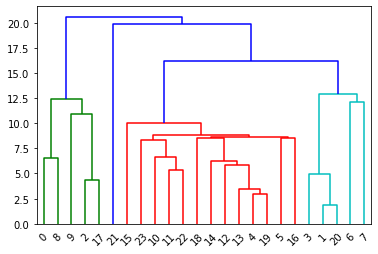

In [23]:
dendrogram(lmat)
plt.show()